In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Loading the Data

In [4]:
plot_summaries_path = '../MovieSummaries/plot_summaries.txt'
movie_metadata_path = '../MovieSummaries/movie.metadata.tsv'
character_metadata_path = '../MovieSummaries/character.metadata.tsv'

plot_summaries = pd.read_csv(plot_summaries_path, sep='\t', header=None, names=['Wikipedia_ID', 'Plot_Summary'])

# Load movie metadata
movie_metadata = pd.read_csv(movie_metadata_path, sep='\t', header=None, names=['Wikipedia_ID', 'Freebase_ID', 'Movie_Name', 'Release_Date', 'Box_Office_Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])

# Load character metadata
character_metadata = pd.read_csv(character_metadata_path, sep='\t', header=None, names=['Wikipedia_ID', 'Freebase_ID', 'Release_Date', 'Character_Name', 'Actor_Birth_Date', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age', 'Character_Actor_Freebase_ID', 'Character_Freebase_ID', 'Actor_Freebase_ID'])


In [5]:
print("=====PLOT SUMMARIES=====")
display(plot_summaries.shape, plot_summaries.head(2))
print("=====MOVIE METADATA=====")
display(movie_metadata.shape, movie_metadata.head(2))
print("=====CHAR. METADATA=====")
display(character_metadata.shape,character_metadata.head(2))

=====PLOT SUMMARIES=====


(42303, 2)

,Wikipedia_ID,Plot_Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...


=====MOVIE METADATA=====


(81741, 9)

,Wikipedia_ID,Freebase_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


=====CHAR. METADATA=====


(450669, 13)

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


In [39]:
df = pd.read_csv("data/merged_movie_metadata.csv")
print("=====MERGED MOVIE DATA=====")
display(df.head(2))

=====MERGED MOVIE DATA=====


,Wikipedia_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres,Continents,Year,...,Production,Website,Response,totalSeasons,Oscar,Nomination_Awards,Win_Awards,Internet_Movie_Database_Rating,Rotten_Tomatoes_Rating,Metacritic_Rating
0,13696889,The Gangsters,1913-05-29,NaN,35.0,"['Silent film', 'English Language']",['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-...",['America'],1957,...,NaN,NaN,True,NaN,0,0,0,5.9,NaN,NaN
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,NaN,NaN,True,NaN,1,6,1,6.8,8.3,NaN


In [96]:
print(list(df.columns))

['Wikipedia_ID', 'Movie_Name', 'Release_Date', 'Box_Office_Revenue', 'Runtime', 'Languages', 'Countries', 'Genres', 'Continents', 'Year', 'Rated', 'Director', 'Writer', 'Actors', 'Plot', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'DVD', 'Production', 'Website', 'Response', 'totalSeasons', 'Oscar', 'Nomination_Awards', 'Win_Awards', 'Internet_Movie_Database_Rating', 'Rotten_Tomatoes_Rating', 'Metacritic_Rating']


# Visualising Data

In [99]:
display(character_metadata['Actor_Ethnicity'].value_counts(dropna = False).head(10).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicities</b>'))

,count
Actor_Ethnicity,
nan,344611
/m/0dryh9k,16351
/m/0x67,10159
/m/041rx,10121
/m/02w7gg,6165
/m/033tf_,3857
/m/0xnvg,2956
/m/02ctzb,2307
/m/07hwkr,2250


In [101]:
unique_count = character_metadata['Actor_Ethnicity'].nunique()
unique_values = character_metadata['Actor_Ethnicity'].unique()
unique_count

479

In [105]:
unique_values

array([nan, '/m/044038p', '/m/0x67', '/m/064b9n', '/m/041rx', '/m/033tf_',
       '/m/04gfy7', '/m/0222qb', '/m/01qhm_', '/m/0dryh9k', '/m/048sp5',
       '/m/04mvp8', '/m/0bzkm2', '/m/02p1pl6', '/m/0bjbszh', '/m/022fdt',
       '/m/0cqgdq', '/m/0ffkb4', '/m/075dhf0', '/m/01hwt', '/m/0xnvg',
       '/m/0dqqwy', '/m/048z7l', '/m/07bch9', '/m/09v5bdn', '/m/02w7gg',
       '/m/03bkbh', '/m/02vsw1', '/m/09kr66', '/m/09vc4s', '/m/0g0x7_',
       '/m/042gtr', '/m/0cm7w1', '/m/046cwm', '/m/04dbw3', '/m/02ctzb',
       '/m/0g8_vp', '/m/092h2qt', '/m/0g6ff', '/m/0278pqj', '/m/0301y_',
       '/m/019kn7', '/m/0cnvdq1', '/m/03295l', '/m/065b6q', '/m/03pqwy',
       '/m/01xhh5', '/m/03ts0c', '/m/06gbnc', '/m/07hwkr', '/m/0bpjh3',
       '/m/0fpjs3j', '/m/04nrnz', '/m/09k5jvk', '/m/07mqps', '/m/08hpk0',
       '/m/03ttfc', '/m/0d9q7j', '/m/075_n6', '/m/0dllcfn', '/m/04kbvpz',
       '/m/03ftx7', '/m/0747611', '/m/025rpb0', '/m/06mvq', '/m/047l_90',
       '/m/029f2r', '/m/01rv7x', '/m/05sf2x', '/m/

In [98]:
display(character_metadata['Actor_Name'].value_counts(dropna = False).head(10).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actors</b>'))

,count
Actor_Name,
nan,1228
Mel Blanc,791
Mithun Chakraborty,328
Oliver Hardy,299
Mohanlal,234
Moe Howard,225
Mammootty,225
Dharmendra Deol,219
Larry Fine,219


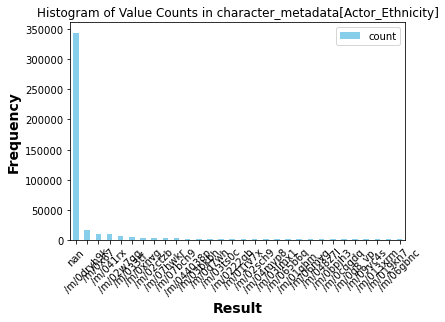

In [37]:
ethnicity_count=character_metadata['Actor_Ethnicity'].value_counts(dropna = False).head(30).to_frame()
# Plot the histogram
ethnicity_count.plot(kind='bar', color='skyblue')
plt.title('Histogram of Value Counts in character_metadata[Actor_Ethnicity]')
plt.xlabel('Result', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.show()

### This huge proportion of NaN is an issue...

In [89]:
character_metadata__ethnicity_nan = character_metadata[pd.isna(character_metadata['Actor_Ethnicity'])]
display(character_metadata__ethnicity_nan.head(3))

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.75,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.65,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [90]:
gender_count=character_metadata['Actor_Gender'].value_counts(dropna = False)
display(gender_count.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender</b>'))

,count
Actor_Gender,
M,270257
F,134803
nan,45609


In [91]:
character_metadata_gender_nan = character_metadata[pd.isna(character_metadata['Actor_Gender'])]
display(character_metadata_gender_nan.head(3))

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
51,2238856,/m/06yc6v,2005-01,Sylvie's Dad,NaN,NaN,NaN,NaN,James Kayten,NaN,/m/0g98dw2,/m/0g98dw5,/m/0g98dwd
82,612710,/m/02wjqm,1999-10-01,NaN,NaN,NaN,NaN,NaN,Kimmy Suzuki,NaN,/m/0gdk_8c,NaN,/m/0gdk_8f
83,31983669,/m/0g4_n3m,1931-09-30,"Lelka, aka 'Merizhka'",NaN,NaN,NaN,NaN,Mariya Gonfa,NaN,/m/0g4_nf5,/m/0g4_ncn,/m/0g4_nck


In [92]:
m_count = character_metadata['Actor_Gender'].value_counts().get('M', 0)
f_count = character_metadata['Actor_Gender'].value_counts().get('F', 0)
m_count, f_count

(np.int64(270257), np.int64(134803))

In [93]:
total_gender_count=character_metadata['Actor_Gender'].count()
total_gender_count

np.int64(405060)

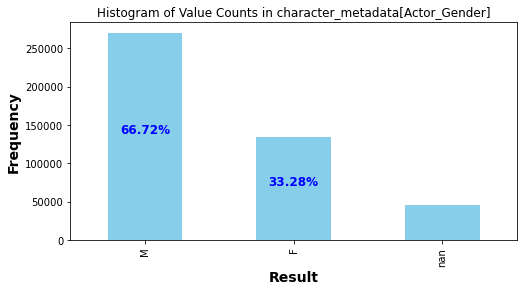

In [94]:
plt.figure(figsize=(8, 4))
ax = gender_count.plot(kind="bar", color="skyblue")
ax.set_title("Histogram of Value Counts in character_metadata[Actor_Gender]")
ax.set_xlabel('Result', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('Frequency', fontdict={'fontsize': 14, 'fontweight': 'bold'})


rects = ax.patches

# Make proportion labels
proportions=[m_count/total_gender_count, f_count/total_gender_count]

for rect, label in zip(rects, proportions):
    ax.text(
        rect.get_x() + rect.get_width() / 2, rect.get_height()/2, f"{label:.2%}", 
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="blue"
    )

plt.show()